### Name: Sumeet Shah
### Date: 04/28/2023
### Project 2
### Title: Predict Housing prices in Boston area

### Business Problem: 

One of the biggest investments that most people make in their lifetime is usually in the Housing market. And the housing prices are ever increasing – In big cities like Boston, New York etc., housing prices are easily in the north of 1 million Dollars. The end use buyer of a house is often left with this dauting question before a housing purchase or sell – Will the price of the house increase or decrease in the coming times? Hence, if we are able to predict the price of the house using Machine learning tools and techniques, it will be a great tool in the hands of ordinary customers and investors alike to make an informed decision of their trade, and avoid being fooled around by drastic price changes. So, the main question that is being answered through this project is how can we estimate the house price based on some key characteristics like Area, Size, age of property, Number of bedrooms etc.

### Dataset

Boston housing dataset:
https://www.kaggle.com/code/shreayan98c/boston-house-price-prediction/input?select=housing.csv

This dataset has 14 attributes:

 1. CRIM      per capita crime rate by town
 2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
 3. INDUS     proportion of non-retail business acres per town
 4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 5. NOX       nitric oxides concentration (parts per 10 million)
 6. RM        average number of rooms per dwelling
 7. AGE       proportion of owner-occupied units built prior to 1940
 8. DIS       weighted distances to five Boston employment centres
 9. RAD       index of accessibility to radial highways
 10. TAX      full-value property-tax rate per 10,000 Dollars
 11. PTRATIO  pupil-teacher ratio by town
 12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 13. LSTAT    Percentage lower status of the population
 14. MEDV     Median value of owner-occupied homes in Dollars 1000's

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

### Loading Data

In [123]:
df=pd.read_csv('C:/Users/14807/DSC680/Project2/HousingData.csv')
print('Shape before deleting duplicates:', df.shape)

Shape before deleting duplicates: (506, 14)


### Table dimension after removing duplicates

In [124]:
# Removing duplicate rows if any
df=df.drop_duplicates()
print('The dimension of the table is:', df.shape)


The dimension of the table is: (506, 14)


### Look at the dataset

In [125]:
print(df.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


### List of columns

In [126]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 59.3 KB


In [128]:
df.nunique()

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      438
MEDV       229
dtype: int64

### Data description

In [129]:
print("Describe Data")
print(df.describe(include='all'))

Describe Data
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560262   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.99

### Exploratory data analysis:

### Histograms

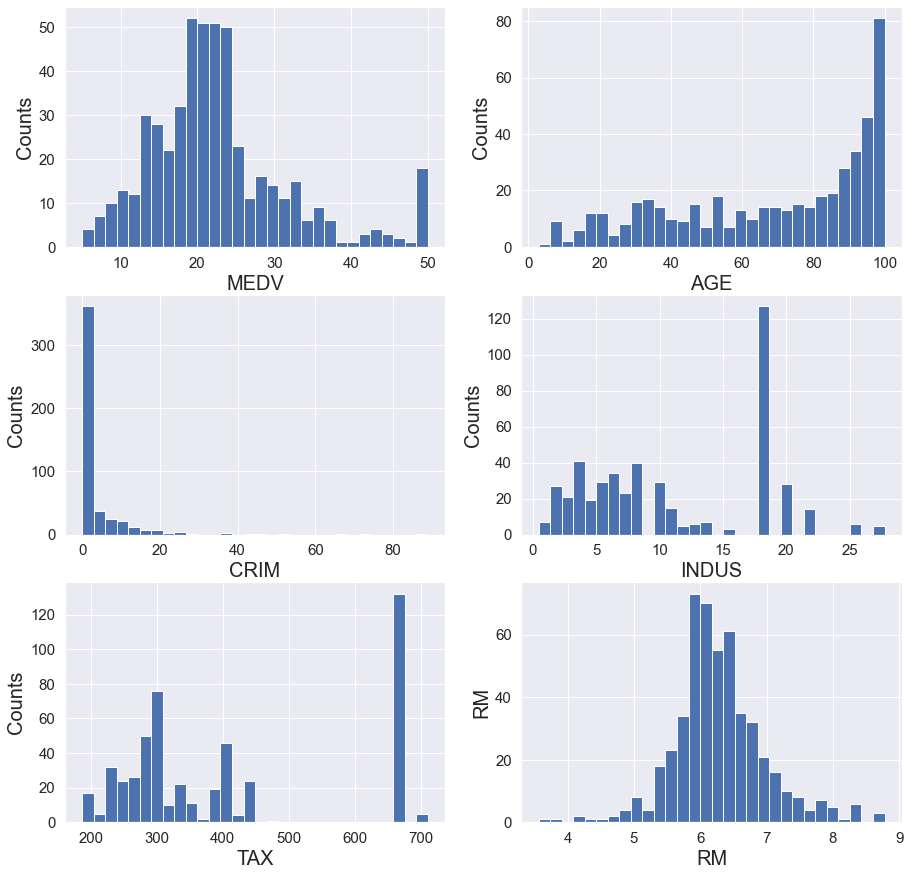

In [130]:
plt.rcParams['figure.figsize'] = (15, 15)
fig, axes = plt.subplots(nrows = 3, ncols = 2)
axes = axes.ravel()
num_features = ['MEDV', 'AGE','CRIM', 'INDUS','TAX', 'RM']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts','Counts', 'Counts','RM']
for idx, ax in enumerate(axes):
 ax.hist(df[num_features[idx]].dropna(), bins=30)
 ax.set_xlabel(xaxes[idx], fontsize=20)
 ax.set_ylabel(yaxes[idx], fontsize=20)
 ax.tick_params(axis='both', labelsize=15)
plt.show()

As seen in the above histograms, most of the key variables are normally distributed - except CRIM, which has positive or right skewness. The final call on which variables to select will be based on correlation analysis from the heat map.

### Barcharts

In [131]:
#Grouping the categorical variables (CHAS and RAD- since both have very less unique values) and checking their distribution.

def PlotBarCharts(input, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        input.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

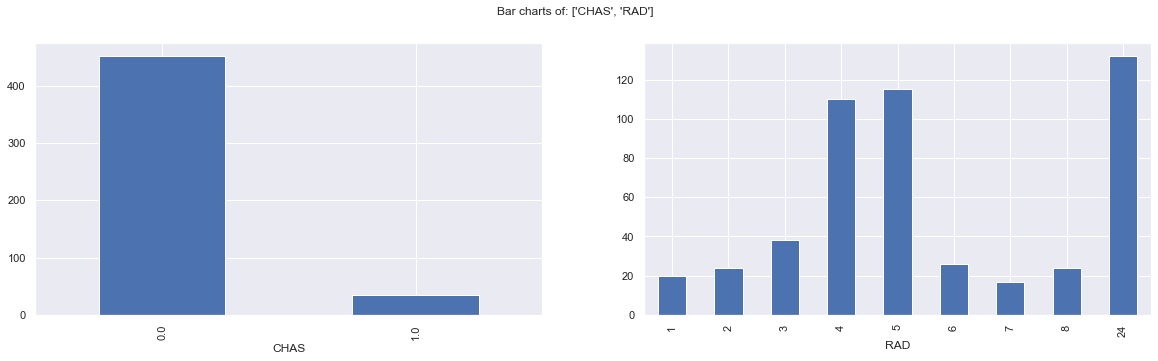

In [132]:
# Plotting the graph by calling function:

PlotBarCharts(input=df, colsToPlot=['CHAS','RAD'])

In this data, "CHAS" is skewed. There is just one bar which is dominating and other one have very less rows. Such columns may not be correlated with the target variable because there is no information to learn. I will confirm this in the correlation analysis section and take a final call to select or reject the column.

### Scatter plots

In [133]:
### Scatter plots

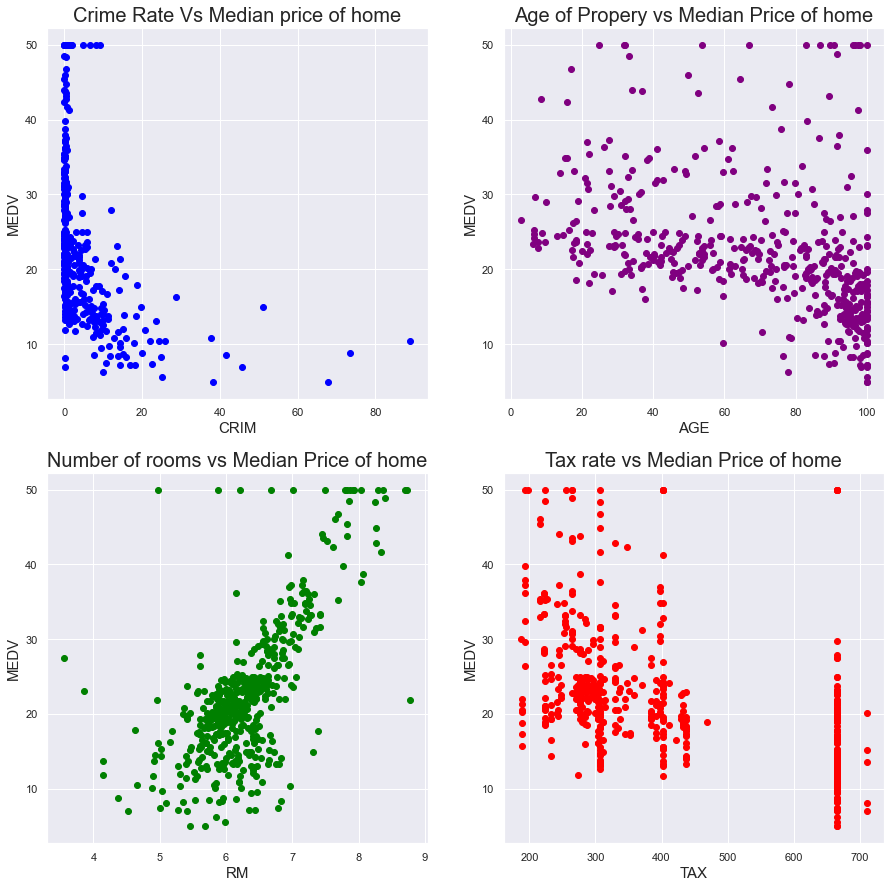

In [134]:
plt.rcParams['figure.figsize'] = (15, 15)
fig, axes = plt.subplots(nrows = 2, ncols = 2)

CRIM = df['CRIM']
MEDV = df['MEDV']
AGE = df['AGE']
RM = df['RM']
TAX = df['TAX']

axes[0,0].scatter(CRIM, MEDV, color = 'Blue')
axes[0,0].set_title('Crime Rate Vs Median price of home', fontsize=20)
axes[0,0].set_ylabel('MEDV', fontsize=15)
axes[0,0].set_xlabel('CRIM', fontsize=15)
axes[0,0].grid(True)


axes[0,1].scatter(AGE, MEDV, color = 'Purple')
axes[0,1].set_title('Age of Propery vs Median Price of home', fontsize=20)
axes[0,1].set_ylabel('MEDV', fontsize=15)
axes[0,1].set_xlabel('AGE', fontsize=15)
axes[0,1].grid(True)

axes[1,0].scatter(RM, MEDV, color = 'Green')
axes[1,0].set_title('Number of rooms vs Median Price of home', fontsize=20)
axes[1,0].set_ylabel('MEDV', fontsize=15)
axes[1,0].set_xlabel('RM', fontsize=15)
axes[1,0].grid(True)

axes[1,1].scatter(TAX, MEDV, color = 'Red')
axes[1,1].set_title('Tax rate vs Median Price of home', fontsize=20)
axes[1,1].set_ylabel('MEDV', fontsize=15)
axes[1,1].set_xlabel('TAX', fontsize=15)
axes[1,1].grid(True)


### Box Plots

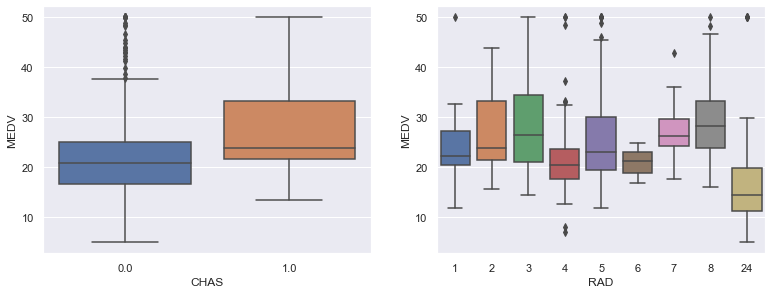

In [135]:
import seaborn as sns
sns.set(style='darkgrid')
num_features = ['CHAS','RAD']
index = 0
plt.figure(figsize=(20,10))
for feature in num_features:
    if feature != "MEDV":
        index += 1
        plt.subplot(2, 3, index)
        sns.boxplot(x=feature, y='MEDV', data=df)

#### Interpreting Box plots:
If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has no effect on the target variable. Hence, the variables are not correlated to each other. On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with MEDV.

In this data, RAD is looking more corelated to MEDV.

### Handling missing values

In [136]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [137]:
df1 = df.copy()

In [138]:
df1 = df1.apply(lambda df1: df1.fillna(df1.mean()),axis=0)
df1.isnull().sum(axis = 0)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Correlation heat map

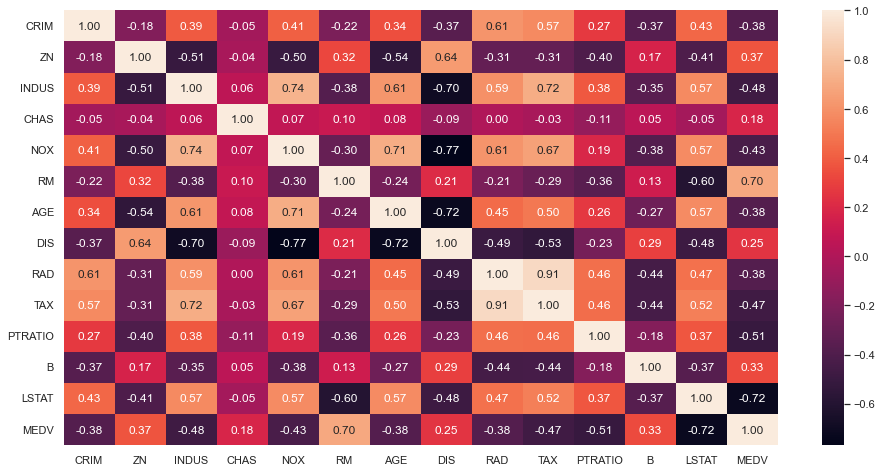

In [139]:
plt.figure(figsize= (16, 8))
sns.heatmap(df1.corr(), annot = True, fmt= '.2f');

### Feature selection

After looking at the correlation Matrix, I am choosing the below 3 features from continuous variables. These are the features with a correlation of greater than + or - .50 with MEDV. With that, the continuous features selected for the model are RM, LSTAT, and PTRATIO.

For the Categorical features, we saw from visual analysis from Box plot, that RAD was correlated with MEDV. So I am choosing RAD as the fourth feature for my model.

In [140]:
# Dropping the features not selected for the model
x = df1.drop(['MEDV', 'ZN', 'CHAS','NOX','AGE','DIS','B','CRIM','INDUS','TAX'], axis = 1)
y = df1['MEDV']
x

,RM,RAD,PTRATIO,LSTAT
0,6.575,1,15.3,4.980000
1,6.421,2,17.8,9.140000
2,7.185,2,17.8,4.030000
3,6.998,3,18.7,2.940000
4,7.147,3,18.7,12.715432
...,...,...,...,...
501,6.593,1,21.0,12.715432
502,6.120,1,21.0,9.080000
503,6.976,1,21.0,5.640000
504,6.794,1,21.0,6.480000


### Training and Test datasets

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [142]:
X_train.head()

,RM,RAD,PTRATIO,LSTAT
397,5.747,24,20.2,19.92
364,8.780,24,20.2,5.29
496,5.390,6,19.2,21.14
202,7.610,2,14.7,3.11
321,6.376,5,19.6,6.87


In [143]:
y_train.head()

397     8.5
364    21.9
496    19.7
202    42.3
321    23.1
Name: MEDV, dtype: float64

In [144]:
y.value_counts()

50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: MEDV, Length: 229, dtype: int64

### Linear Regression

In [145]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

#Train the model using training sets 
lm.fit(X_train, y_train)


train_pred = lm.predict(X_train)

In [146]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [147]:
# Model Evaluation

print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6586285566748333
Adjusted R^2: 0.6547159899891581
MAE: 3.8216455539577567
MSE: 29.721692974624105
RMSE: 5.451760539002434


In [148]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [149]:
# Model Evaluation
r2_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', r2_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.6830626038988747
Adjusted R^2: 0.674438457066191
MAE: 3.6482561454596705
MSE: 24.464657558458953
RMSE: 4.946176054131004


### SVM Model

In [150]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [151]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [152]:
# Train the model using the training sets 
reg.fit(X_train, y_train)

SVR()

In [153]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [154]:
# Model Evaluation
r2_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', r2_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7069994618744468
Adjusted R^2: 0.6990266581159283
MAE: 2.990604373545244
MSE: 22.61695185821085
RMSE: 4.755728320479509


### Random forest

In [155]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

In [156]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [157]:
# Model Evaluation
r2_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', r2_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8039436583814449
Adjusted R^2: 0.7986087919428447
MAE: 2.748921052631579
MSE: 15.133749815789459
RMSE: 3.8902120528050212


### Comparing Model performances

In [158]:
r2_linreg_score=r2_linreg*100
r2_rf_score=r2_rf*100
r2_svm_score=r2_svm*100
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Support Vector Machines'],
    'R-squared Score': [r2_linreg_score, r2_rf_score, r2_svm_score]})

In [159]:
models

,Model,R-squared Score
0,Linear Regression,68.306260
1,Random Forest,80.394366
2,Support Vector Machines,70.699946


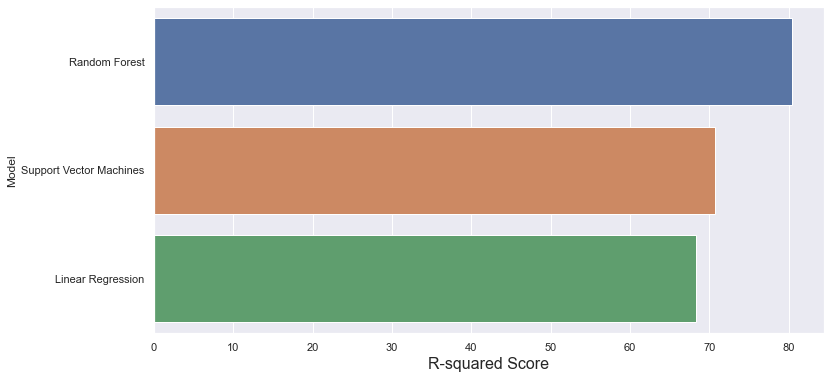

In [160]:
f, axe = plt.subplots(1,1, figsize=(12,6))

models.sort_values(by=['R-squared Score'],ascending=False, inplace=True)

sns.barplot(x='R-squared Score', y='Model', data=models, ax=axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('R-squared Score', size=16)
axe.set_ylabel('Model')
plt.show()

Conclusion: Based on the above results, I am selecting Random Forest Model for my price prediction application, as its having a R2 value of >82.

### Model application to predict client home values

In [161]:
# Produce a dataframe for client data
data = {'RM' : [3,1,8,2],
        'RAD': [1,24,1, 24],
        'PTRATIO': [19,17,4,22],
        'LSTAT': [13,38,3,19]}


In [162]:
client_values = pd.DataFrame(data)
client_values

,RM,RAD,PTRATIO,LSTAT
0,3,1,19,13
1,1,24,17,38
2,8,1,4,3
3,2,24,22,19


In [163]:
for i, price in enumerate(reg.predict(pd.DataFrame(client_values))):
    print("Predicted selling price for Client {}'s home (in $1,000's): ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home (in $1,000's): $21.38
Predicted selling price for Client 2's home (in $1,000's): $14.52
Predicted selling price for Client 3's home (in $1,000's): $19.31
Predicted selling price for Client 4's home (in $1,000's): $21.37


C:\Users\14807\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
